# Import Libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Using TensorFlow backend.


In [2]:
np.random.seed(0)       # To solve randomness problem after each run

# Load first class of data

In [3]:
f_list = []
for name in os.listdir(os.chdir('/home/nada/Desktop/models/object_detection/not Essaily')):
    img_1 = cv2.imread(name,cv2.IMREAD_GRAYSCALE)         # load data in gray scale
    f_list.append(img_1.reshape(-1))                      # reshape data

## Convert first class of data into numpy array

In [4]:
array_img_1 = np.array(f_list)
array_img_1.shape

(747, 180000)

## Add labels column

In [5]:
df_1 = pd.DataFrame(array_img_1, columns = map(str, range(180000))) 
df_1["name"] = 'Not Essaily'

# Load second class of data

In [6]:
f_list_2 = []
for img_name in os.listdir(os.chdir('/home/nada/Desktop/models/object_detection/Essaily')):
    img_2 = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)           # load data in gray scale
    f_list_2.append(img_2.reshape(-1))                           # reshape data

array_img_2 = np.array(f_list_2)      # convert second class of data into numpy array
array_img_2.shape

(747, 180000)

## Add labels column

In [7]:
df_2 = pd.DataFrame(array_img_2, columns = map(str, range(180000))) 
df_2["name"] = 'Essaily'

# Concatenate two classes

In [8]:
df = pd.concat((df_1, df_2), ignore_index = True, sort = False)
df

,0,1,2,3,4,5,6,7,8,9,...,179991,179992,179993,179994,179995,179996,179997,179998,179999,name
0,54,54,54,54,54,54,54,56,56,56,...,57,56,56,54,54,54,53,53,53,Not Essaily
1,51,51,51,51,51,51,51,51,51,51,...,99,99,99,97,100,99,100,101,100,Not Essaily
2,158,156,153,151,151,150,150,148,146,145,...,72,78,92,95,95,94,93,86,78,Not Essaily
3,112,112,112,113,113,114,114,115,116,115,...,89,91,92,93,93,95,96,96,96,Not Essaily
4,155,152,151,151,151,151,152,152,152,152,...,74,74,71,67,65,67,71,73,75,Not Essaily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,139,139,139,139,139,137,137,136,136,136,...,59,56,57,63,74,85,89,94,104,Essaily
1490,128,125,123,123,123,123,123,123,123,123,...,144,144,144,143,143,136,114,73,65,Essaily
1491,190,229,231,231,230,230,230,230,230,230,...,114,128,137,148,153,152,156,161,164,Essaily
1492,127,125,124,124,124,124,124,124,124,124,...,64,71,75,76,76,71,66,63,61,Essaily


In [9]:
os.chdir('/home/nada/Desktop/models/object_detection')

In [10]:
#df.to_csv("data.csv")

In [11]:
#data = pd.read_csv("data.csv")
#data

### shuffle data randomly

In [12]:
data = df.sample(frac = 1).reset_index(drop=True)     
data

,0,1,2,3,4,5,6,7,8,9,...,179991,179992,179993,179994,179995,179996,179997,179998,179999,name
0,93,93,94,94,95,96,96,97,97,99,...,87,97,111,108,84,64,60,57,58,Essaily
1,125,125,124,124,123,123,123,123,122,122,...,72,71,71,72,72,72,72,72,70,Essaily
2,100,100,100,100,100,100,100,101,101,101,...,136,118,98,88,95,101,101,101,101,Essaily
3,131,130,130,130,130,129,129,129,129,127,...,105,102,93,83,76,72,70,69,72,Not Essaily
4,30,30,30,30,30,30,30,30,30,30,...,40,41,42,42,42,54,71,78,78,Essaily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,138,136,135,135,135,134,133,131,131,131,...,144,154,155,114,66,51,53,53,53,Essaily
1490,128,128,128,128,128,128,129,128,125,123,...,66,66,65,64,63,62,60,60,60,Essaily
1491,113,113,113,113,113,113,113,113,113,113,...,66,58,57,57,56,56,57,58,59,Essaily
1492,122,121,121,119,117,116,115,115,114,112,...,66,69,71,77,78,79,84,86,88,Not Essaily


# Split data into features and labels

In [13]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values
print('shape of X: ',X.shape)

shape of X:  (1494, 180000)


### Reshape data for CNN model

In [14]:
X = X.reshape(-1, 600, 300,1)
X.shape

(1494, 600, 300, 1)

In [16]:
y

array(['Essaily', 'Essaily', 'Essaily', ..., 'Essaily', 'Not Essaily',
       'Not Essaily'], dtype=object)

> We need to convert these categorical labels into ones and zeros by label encoder

## Categorical data handling

In [17]:
LE = LabelEncoder()

y = LE.fit_transform(y)

y

array([0, 0, 0, ..., 0, 1, 1])

# split data into train and test

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_val.shape         # check shape of validation data

(299, 600, 300, 1)

# Implement CNN model

In [20]:
model = Sequential()
model.add(Dense(32, input_shape=(600,300,1), activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))


model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600, 300, 32)      64        
_________________________________________________________________
conv2d (Conv2D)              (None, 600, 300, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 300, 150, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 300, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 75, 32)       0         
_________________________________________

# Data Augmentation

In [21]:
train_dataGen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_dataGen = ImageDataGenerator(rescale=1./255)

history=model.fit_generator(train_dataGen.flow(X_train, y_train, batch_size=8),
                           steps_per_epoch=np.ceil(len(X_train)/8), epochs= 40 ,
                            validation_data=test_dataGen.flow(X_val, y_val))

Epoch 1/40
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
150/150 [==============================] - 297s 2s/step - loss: 0.6793 - acc: 0.5172 - val_loss: 0.6738 - val_acc: 0.7224
Epoch 2/40
150/150 [==============================] - 300s 2s/step - loss: 0.6130 - acc: 0.6870 - val_loss: 0.5555 - val_acc: 0.8896
Epoch 3/40
150/150 [==============================] - 299s 2s/step - loss: 0.4935 - acc: 0.7933 - val_loss: 0.6197 - val_acc: 0.5518
Epoch 4/40
150/150 [==============================] - 299s 2s/step - loss: 0.3802 - acc: 0.8351 - val_loss: 0.5313 - val_acc: 0.7391
Epoch 5/40
150/150 [==============================] - 298s 2s/step - loss: 0.3284 - acc: 0.8653 - val_loss: 0.3696 - val_acc: 0.8395
Epoch 6/40
150/150 [==============================] - 297s 2s/step - loss: 0.2862 - acc: 0.8753 - val_loss: 0.3774 - val_acc: 0.8462
Epoch 7/40
150/150 [==============================] - 297s 2s/step - loss: 0.3174 - acc: 0.8812 - val_loss: 

## Save the model

In [22]:
model.save("model_aug.h5")

# SSD configurations

## Import Libraries for object detection

In [20]:
import numpy as np
from tensorflow.keras.models import load_model
import os
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile
import tensorflow as tf
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
import cv2

In [21]:
os.chdir('/home/nada/Desktop/models/object_detection')

## Import object detection modules

In [22]:
from utils import label_map_util

from utils import visualization_utils as vis_util

## Load SSD mobile net model

In [23]:
 #What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

## Detection

In [24]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Load label map

In [25]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Run SSD object detector model 

In [ ]:
cap = cv2.VideoCapture('test 3.mp4')
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter('out.avi', fourcc, 20.0, (640,480))
img_counter=11
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        %matplotlib inline
        while True: 
            ret, image_np = cap.read() 
            if ret:
                image_np_expanded = np.expand_dims(image_np, axis=0)
                image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
                # Each box represents a part of the image where a particular object was detected.
                boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
                # Each score represent how level of confidence for each of the objects.
                # Score is shown on the result image, together with the class label.
                scores = detection_graph.get_tensor_by_name('detection_scores:0')
                classes = detection_graph.get_tensor_by_name('detection_classes:0')
                num_detections = detection_graph.get_tensor_by_name('num_detections:0')
                # Actual detection.
                (boxes, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],feed_dict={image_tensor: image_np_expanded})




                height = image_np.shape[0]
                width = image_np.shape[1]

                # return box dimension to its original value (as it was normalized )
                for box in np.squeeze(boxes):
                    box[0] = box[0]*height
                    box[1] = box[1]*width
                    box[2] = box[2]*height
                    box[3] = box[3]*width


                # Convert boxes dimensions from float into integer values
                boxes = boxes.astype(np.int32)

                X_test = [] 
      
    
    
                # load model
                model = load_model('model_aug.h5')  
    

                # Testing data
                if len(np.squeeze(boxes))>0:
                   for i,box in enumerate(np.squeeze(boxes)):
                        if np.squeeze(classes)[i]==1 and np.squeeze(scores)[i]>0.5:
                            roi = image_np[(box[0]+10):(box[2]-10), (box[1]+10):(box[3]-10)]
                            roi = cv2.resize(roi, (300, 600))
                            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                            X_test = roi.reshape(1,600,300,1)
                            
                            test_datagen = ImageDataGenerator(rescale=1./255)  
                                
                                
                            response = model.predict_generator(test_datagen.flow(np.array(X_test)),
                                                               steps=np.ceil(len(X_test)/8))
                            
                            # Convert prediction from 2D to 1D
                            r = np.squeeze(response)
                            
                            # Convert prediction value into class name
                            if r[1]>0.5:
                                res=LE.inverse_transform([1])
                            else:
                                res=LE.inverse_transform([0])
                            
                            
                           
                            # drawing a rectangle on the detected face 
                            cv2.rectangle(image_np, (box[1], box[0]), (box[3], box[2]),(255, 0, 0), 3) 

                            # adding detected/predicted name for the face 
                            cv2.putText(image_np, res[0], (box[1]-5, box[0]-5),
                                        cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 0), 2) 

                            
                image_np = cv2.resize(image_np, (640,480))           
                cv2.imshow("full", image_np)
                out.write(image_np)
                
                j = cv2.waitKey(1)
                if j%256 == 32:
                    cv2.imwrite('Results/{}.png'.format(img_counter), image_np)
                    img_counter+=1
                    
                
                k = cv2.waitKey(30) & 0xff
                if k == 27:
                    break
        
cap.release() 
cv2.destroyAllWindows() 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Show the results

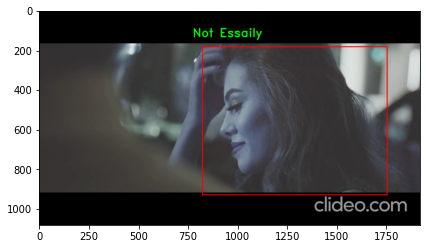

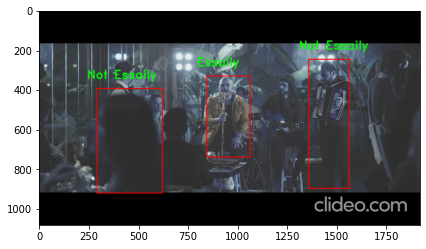

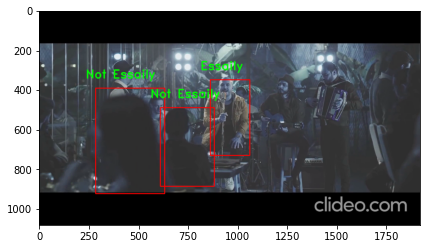

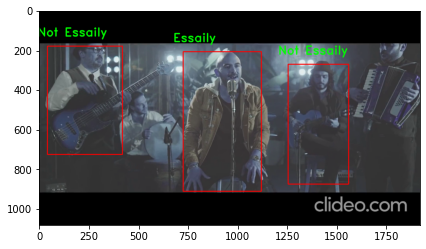

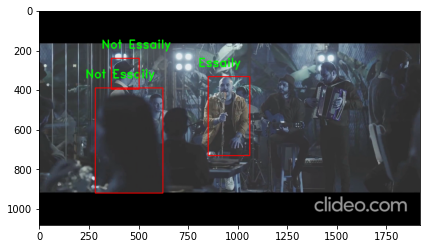

In [10]:
import matplotlib.pyplot as plt
i=0
for name in os.listdir(os.chdir('/home/nada/Desktop/models/object_detection/Results')):
    img_1 = cv2.imread(name)
    f = plt.figure(figsize=(15,15)) 
    f.add_subplot(3,2,i+1) # adding sub plot to figure on each iteration
    plt.imshow(img_1) 
    i+=1